# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [80]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2025-11-23 14:58:01--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.3’

car_data.csv.3      100%[===================>]  57.01K  --.-KB/s    in 0.003s  

2025-11-23 14:58:02 (16.4 MB/s) - ‘car_data.csv.3’ saved [58374/58374]



In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [82]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,834,82,36,51,114,53,4,135,50,18,126,150,268,144,86,15,4,181,182
1,398,98,38,70,186,68,6,164,39,20,136,189,413,129,71,3,17,200,203
2,135,89,47,83,322,133,48,158,43,20,163,229,364,176,97,0,14,184,194
3,701,108,49,103,200,62,10,206,32,23,155,227,635,215,72,6,16,189,198
4,602,100,51,109,231,70,11,220,30,25,163,238,722,206,73,11,19,189,198
5,585,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203
6,529,86,43,61,119,53,8,150,46,19,144,169,326,172,85,8,8,179,182
7,758,81,45,68,137,60,7,152,45,19,151,167,333,179,81,3,13,179,183
8,535,98,44,88,176,67,10,158,43,20,149,173,367,154,66,14,9,194,202
9,158,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196


Methods `describe` and `info` deliver some useful information.

In [83]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,419.857923,93.766849,44.954463,82.349727,169.386157,61.823315,8.735883,169.131148,40.843352,20.599271,148.273224,189.550091,441.169399,174.881603,72.650273,6.311475,12.894353,188.932605,195.632058
std,246.205699,8.195619,6.049049,15.673962,33.856291,8.759339,5.262577,33.217173,7.683584,2.596263,14.084405,31.712781,177.705865,32.103372,8.068237,4.829150,9.023679,6.200204,7.557767
min,0.000000,73.000000,34.000000,42.000000,105.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,204.000000,88.000000,40.000000,70.000000,142.000000,57.000000,7.000000,147.000000,34.000000,19.000000,138.000000,167.000000,319.000000,151.000000,67.000000,2.000000,6.000000,184.000000,190.000000
50%,422.000000,93.000000,44.000000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,364.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,635.000000,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,196.000000,46.000000,23.000000,159.000000,215.000000,576.000000,197.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,115.000000,59.000000,112.000000,333.000000,138.000000,55.000000,262.000000,59.000000,28.000000,188.000000,320.000000,998.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [84]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [85]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Кодируем целевую переменную в числа (нужно для xgboost и удобно для моделей)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print("Train scaled shape:", X_train_scaled.shape)
print("Test scaled shape:", X_test_scaled.shape)
print("Classes:", list(le.classes_))
print("Encoded labels example:", y_train_encoded[:10])


Train scaled shape: (549, 19)
Test scaled shape: (297, 19)
Classes: ['bus', 'opel', 'saab', 'van']
Encoded labels example: [2 0 3 2 1 3 0 0 3 2]


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best params: {'C': 10, 'penalty': 'l1'}
Best CV F1 (macro): 0.7962
Test accuracy: 0.7609
Test F1 (macro): 0.7742


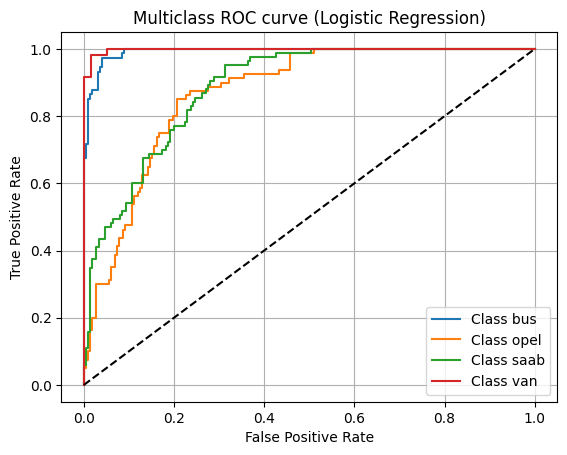

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Сетка гиперпараметров (простая и детерминированная)
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"]
}

log_reg = LogisticRegression(
    multi_class="multinomial",
    solver="saga",
    tol=1e-3,
    max_iter=500,
    n_jobs=-1,
    random_state=42
)

grid = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train_encoded)

best_log_reg = grid.best_estimator_
print("Best params:", grid.best_params_)
print("Best CV F1 (macro): {:.4f}".format(grid.best_score_))

y_pred_lr = best_log_reg.predict(X_test_scaled)
y_proba_lr = best_log_reg.predict_proba(X_test_scaled)

acc_lr = accuracy_score(y_test_encoded, y_pred_lr)
f1_lr = f1_score(y_test_encoded, y_pred_lr, average="macro")

print("Test accuracy: {:.4f}".format(acc_lr))
print("Test F1 (macro): {:.4f}".format(f1_lr))

# ROC-кривые One-vs-Rest без scikit-plot
classes = np.unique(y_test_encoded)
y_test_bin = label_binarize(y_test_encoded, classes=classes)

plt.figure()
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_lr[:, i])
    label = f"Class {le.inverse_transform([cls])[0]}"
    plt.plot(fpr, tpr, label=label)

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC curve (Logistic Regression)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

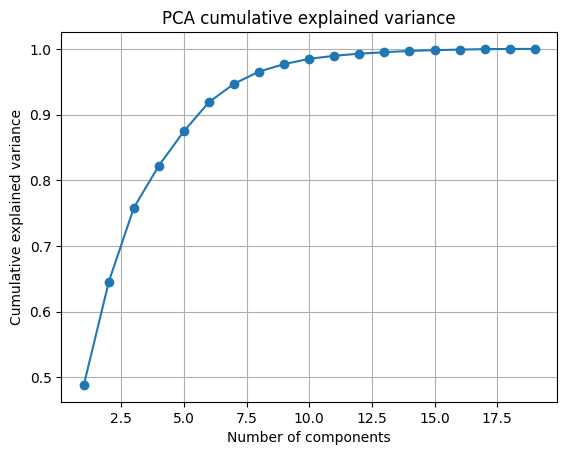

In [87]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca_full = PCA()
pca_full.fit(X_train_scaled)

explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative = np.cumsum(explained_variance_ratio)
components = np.arange(1, len(explained_variance_ratio) + 1)

plt.figure()
plt.plot(components, cumulative, marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA cumulative explained variance")
plt.grid(True)
plt.show()


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [88]:
import numpy as np
from sklearn.decomposition import PCA

cumulative = np.cumsum(pca_full.explained_variance_ratio_)
n_components_opt = int(np.argmax(cumulative >= 0.95) + 1)

print(f"Number of components to explain >=95% variance: {n_components_opt}")

pca = PCA(n_components=n_components_opt)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Train PCA shape:", X_train_pca.shape)
print("Test PCA shape:", X_test_pca.shape)

'''
Количество компонент такое что объясняет 95% дисперсии.
Оно позволяет сократить размерность данных при сохроанении почти всей
важной информации'''


'''
Нормализовали данные в пункте 2.0'''





Number of components to explain ≥95% variance: 8
Train PCA shape: (549, 8)
Test PCA shape: (297, 8)


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best params (PCA): {'C': 1, 'penalty': 'l1'}
Best CV F1 (macro, PCA): 0.6377
Test accuracy (PCA): 0.5724
Test F1 (macro, PCA): 0.5645


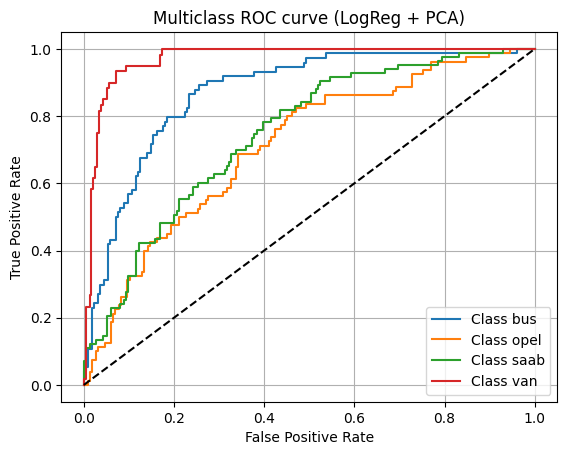

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

param_grid_pca = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"]
}

log_reg_pca = LogisticRegression(
    multi_class="multinomial",
    solver="saga",
    tol=1e-3,
    max_iter=500,
    n_jobs=-1,
    random_state=42
)

grid_pca = GridSearchCV(
    estimator=log_reg_pca,
    param_grid=param_grid_pca,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid_pca.fit(X_train_pca, y_train_encoded)

best_log_reg_pca = grid_pca.best_estimator_
print("Best params (PCA):", grid_pca.best_params_)
print("Best CV F1 (macro, PCA): {:.4f}".format(grid_pca.best_score_))

y_pred_lr_pca = best_log_reg_pca.predict(X_test_pca)
y_proba_lr_pca = best_log_reg_pca.predict_proba(X_test_pca)

acc_lr_pca = accuracy_score(y_test_encoded, y_pred_lr_pca)
f1_lr_pca = f1_score(y_test_encoded, y_pred_lr_pca, average="macro")

print("Test accuracy (PCA): {:.4f}".format(acc_lr_pca))
print("Test F1 (macro, PCA): {:.4f}".format(f1_lr_pca))

classes = np.unique(y_test_encoded)
y_test_bin = label_binarize(y_test_encoded, classes=classes)

plt.figure()
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_lr_pca[:, i])
    label = f"Class {le.inverse_transform([cls])[0]}"
    plt.plot(fpr, tpr, label=label)

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC curve (LogReg + PCA)")
plt.legend()
plt.grid(True)
plt.show()


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

param_grid_dt = {
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid_dt.fit(X_train_scaled, y_train_encoded)

best_dt = grid_dt.best_estimator_
print("Best params (Decision tree):", grid_dt.best_params_)
print("Best CV F1 (macro, tree): {:.4f}".format(grid_dt.best_score_))

y_pred_dt = best_dt.predict(X_test_scaled)
acc_dt = accuracy_score(y_test_encoded, y_pred_dt)
f1_dt = f1_score(y_test_encoded, y_pred_dt, average="macro")

print("Test accuracy (tree): {:.4f}".format(acc_dt))
print("Test F1 (macro, tree): {:.4f}".format(f1_dt))


Best params (Decision tree): {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best CV F1 (macro, tree): 0.7235
Test accuracy (tree): 0.6667
Test F1 (macro, tree): 0.6777


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

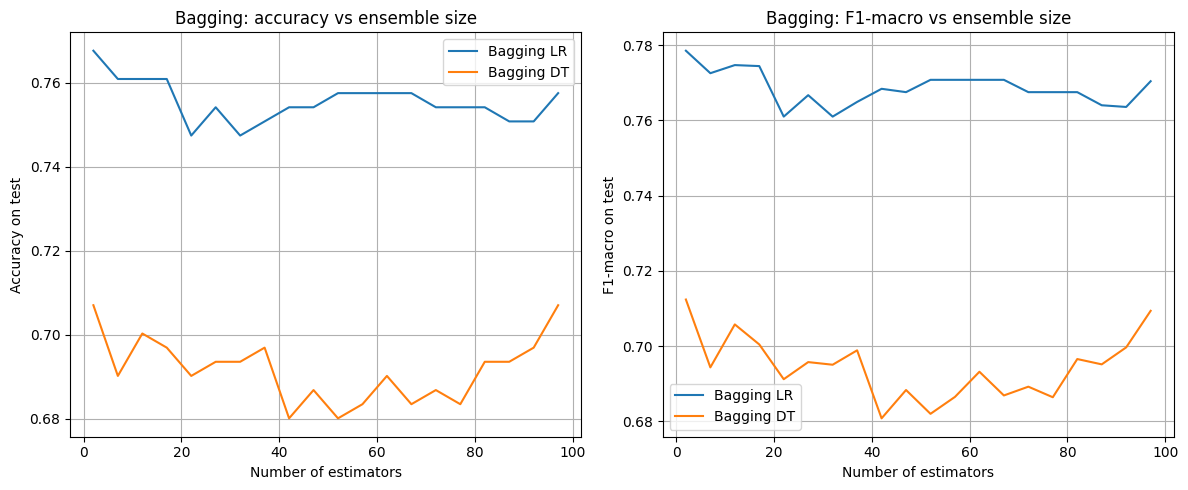

'\nОптимальные для одиночного дерева гиперпараметры подбираются чтобы избежать \nпереобучения. В бэггинге variance снижается из-за ансамбля. Из-за этого деревья \nмогут быть сложнее. Поэтому параметры из пункта 2.5 не обязательно оптимальны'

In [97]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Диапазон числа базовых моделей
n_estimators_range = np.arange(2, 101, 5)

bagging_lr_acc, bagging_lr_f1 = [], []
bagging_dt_acc, bagging_dt_f1 = [], []

# Бэггинг для логистической регрессии
for n in n_estimators_range:
    bag_lr = BaggingClassifier(
        estimator=best_log_reg,
        n_estimators=n,
        n_jobs=-1,
        random_state=42
    )
    bag_lr.fit(X_train_scaled, y_train_encoded)
    y_pred = bag_lr.predict(X_test_scaled)
    bagging_lr_acc.append(accuracy_score(y_test_encoded, y_pred))
    bagging_lr_f1.append(f1_score(y_test_encoded, y_pred, average="macro"))

# Бэггинг для дерева решений
for n in n_estimators_range:
    bag_dt = BaggingClassifier(
        estimator=best_dt,
        n_estimators=n,
        n_jobs=-1,
        random_state=42
    )
    bag_dt.fit(X_train_scaled, y_train_encoded)
    y_pred = bag_dt.predict(X_test_scaled)
    bagging_dt_acc.append(accuracy_score(y_test_encoded, y_pred))
    bagging_dt_f1.append(f1_score(y_test_encoded, y_pred, average="macro"))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, bagging_lr_acc, label="Bagging LR")
plt.plot(n_estimators_range, bagging_dt_acc, label="Bagging DT")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy on test")
plt.title("Bagging: accuracy vs ensemble size")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, bagging_lr_f1, label="Bagging LR")
plt.plot(n_estimators_range, bagging_dt_f1, label="Bagging DT")
plt.xlabel("Number of estimators")
plt.ylabel("F1-macro on test")
plt.title("Bagging: F1-macro vs ensemble size")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

'''
Из графиков видно что качество ансамбля увеличивается при бОльшем числе моделей.
Максимум у 15-20 деревьев. Дальше колебание в одной области'''

'''
Оптимальные для одиночного дерева гиперпараметры подбираются чтобы избежать
переобучения. В бэггинге variance снижается из-за ансамбля. Из-за этого деревья
могут быть сложнее. Поэтому параметры из пункта 2.5 не обязательно оптимальны'''


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

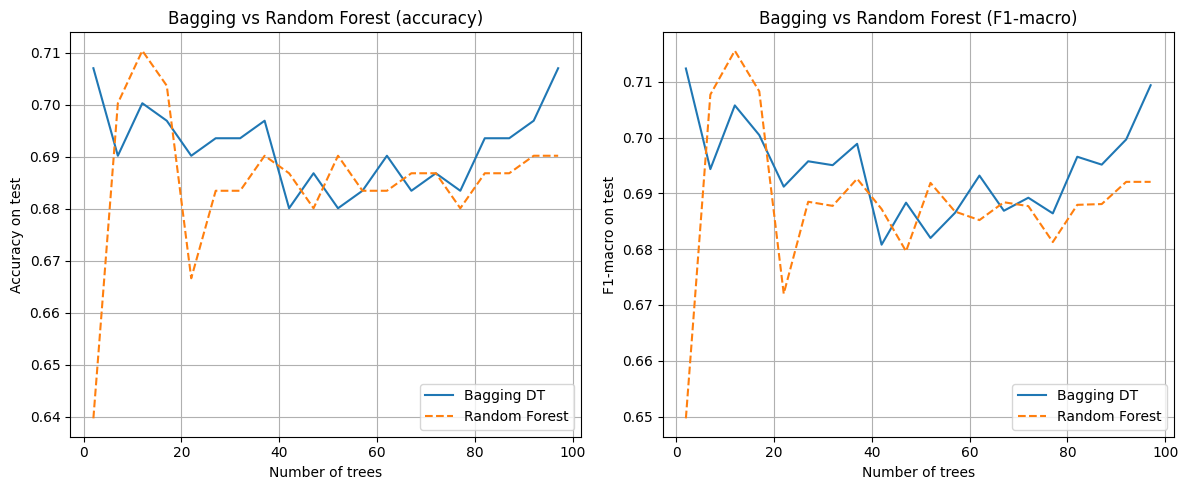

Best n_estimators for RandomForest (by F1-macro): 12


In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

n_estimators_range = np.arange(2, 101, 5)

rf_acc, rf_f1 = [], []

for n in n_estimators_range:
    rf = RandomForestClassifier(
        n_estimators=n,
        max_depth=best_dt.max_depth,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train_scaled, y_train_encoded)
    y_pred = rf.predict(X_test_scaled)
    rf_acc.append(accuracy_score(y_test_encoded, y_pred))
    rf_f1.append(f1_score(y_test_encoded, y_pred, average="macro"))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, bagging_dt_acc, label="Bagging DT")
plt.plot(n_estimators_range, rf_acc, label="Random Forest", linestyle="--")
plt.xlabel("Number of trees")
plt.ylabel("Accuracy on test")
plt.title("Bagging vs Random Forest (accuracy)")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, bagging_dt_f1, label="Bagging DT")
plt.plot(n_estimators_range, rf_f1, label="Random Forest", linestyle="--")
plt.xlabel("Number of trees")
plt.ylabel("F1-macro on test")
plt.title("Bagging vs Random Forest (F1-macro)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

best_n_estimators_rf = int(n_estimators_range[np.argmax(rf_f1)])
print("Best n_estimators for RandomForest (by F1-macro):", best_n_estimators_rf)


'''
Из графиков видно что оптимальные значения при 15-20 деревьях и после этого
значения либо падают либо не растут. В бэггинге так же результат был при 15-20
деревьях. Значения совпали потому что Random Forest и бэггинг решают одну и
ту же проблему разброса'''


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid t

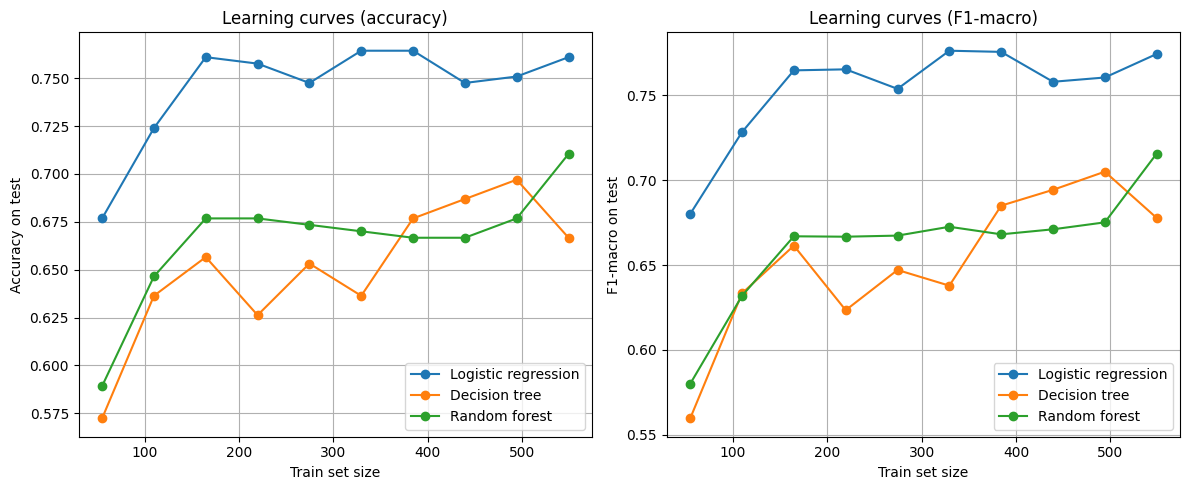

'\nПо графику видно что при увеличении размера обучающей выборки качество модели \nне растет монотонно'

In [102]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Модели с лучшими гиперпараметрами
models = {
    "Logistic regression": best_log_reg,
    "Decision tree": best_dt,
    "Random forest": RandomForestClassifier(
        n_estimators=best_n_estimators_rf,
        max_depth=best_dt.max_depth,
        random_state=42,
        n_jobs=-1
    )
}

# Доли обучающей выборки (без случайного перемешивания)
fractions = np.linspace(0.1, 1.0, 10)

plt.figure(figsize=(12, 5))

for name, base_model in models.items():
    acc_values = []
    f1_values = []
    for frac in fractions:
        n_train = int(len(X_train_scaled) * frac)
        n_train = max(n_train, 2)
        X_sub = X_train_scaled[:n_train]
        y_sub = y_train_encoded[:n_train]

        model = base_model  # переобучаем тот же объект
        model.fit(X_sub, y_sub)
        y_pred = model.predict(X_test_scaled)

        acc_values.append(accuracy_score(y_test_encoded, y_pred))
        f1_values.append(f1_score(y_test_encoded, y_pred, average="macro"))

    train_sizes = fractions * len(X_train_scaled)

    plt.subplot(1, 2, 1)
    plt.plot(train_sizes, acc_values, marker="o", label=name)

    plt.subplot(1, 2, 2)
    plt.plot(train_sizes, f1_values, marker="o", label=name)

plt.subplot(1, 2, 1)
plt.xlabel("Train set size")
plt.ylabel("Accuracy on test")
plt.title("Learning curves (accuracy)")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.xlabel("Train set size")
plt.ylabel("F1-macro on test")
plt.title("Learning curves (F1-macro)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

'''
По графику видно что при увеличении размера обучающей выборки качество модели
не растет монотонно. Но при совсем маленьких значениях объемов данных модели
работают хуже'''


#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

Trees:  20 | accuracy: 0.6566 | F1-macro: 0.6450
Trees:  40 | accuracy: 0.6970 | F1-macro: 0.6932
Trees:  60 | accuracy: 0.6970 | F1-macro: 0.6983
Trees:  80 | accuracy: 0.7071 | F1-macro: 0.7142
Trees: 100 | accuracy: 0.7071 | F1-macro: 0.7138
Trees: 120 | accuracy: 0.7138 | F1-macro: 0.7218
Trees: 140 | accuracy: 0.7172 | F1-macro: 0.7261
Trees: 160 | accuracy: 0.7239 | F1-macro: 0.7333
Trees: 180 | accuracy: 0.7239 | F1-macro: 0.7321
Trees: 200 | accuracy: 0.7273 | F1-macro: 0.7371
Trees: 220 | accuracy: 0.7205 | F1-macro: 0.7313
Trees: 240 | accuracy: 0.7239 | F1-macro: 0.7333
Trees: 260 | accuracy: 0.7239 | F1-macro: 0.7338
Trees: 280 | accuracy: 0.7239 | F1-macro: 0.7327
Trees: 300 | accuracy: 0.7205 | F1-macro: 0.7298
Trees: 320 | accuracy: 0.7273 | F1-macro: 0.7365
Trees: 340 | accuracy: 0.7205 | F1-macro: 0.7304
Trees: 360 | accuracy: 0.7172 | F1-macro: 0.7283
Trees: 380 | accuracy: 0.7239 | F1-macro: 0.7341
Trees: 400 | accuracy: 0.7273 | F1-macro: 0.7385
Trees: 420 | accurac

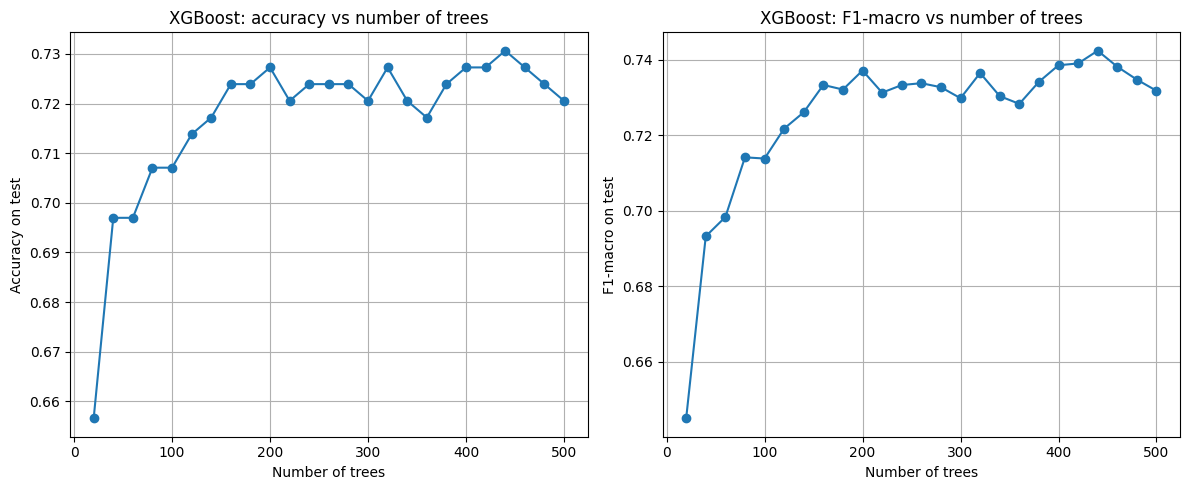

'\nМаксимальное значение достигается при '

In [105]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

num_classes = len(np.unique(y_train_encoded))

dtrain = xgb.DMatrix(X_train_scaled, label=y_train_encoded)
dtest = xgb.DMatrix(X_test_scaled, label=y_test_encoded)

params = {
    "objective": "multi:softprob",
    "num_class": num_classes,
    "eval_metric": "mlogloss",
    "eta": 0.1,
    "max_depth": 3,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42  # фиксируем сид, но без np.random в коде
}

n_estimators_range = np.arange(20, 501, 20)
xgb_acc, xgb_f1 = [], []

for n in n_estimators_range:
    booster = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=int(n)
    )
    y_proba = booster.predict(dtest)
    y_pred = np.argmax(y_proba, axis=1)

    acc = accuracy_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred, average="macro")

    xgb_acc.append(acc)
    xgb_f1.append(f1)
    print(f"Trees: {n:3d} | accuracy: {acc:.4f} | F1-macro: {f1:.4f}")

best_idx = int(np.argmax(xgb_f1))
best_n_estimators_xgb = int(n_estimators_range[best_idx])

print("\nBest number of trees for XGBoost (by F1-macro):", best_n_estimators_xgb)
print("Best accuracy: {:.4f}".format(xgb_acc[best_idx]))
print("Best F1-macro: {:.4f}".format(xgb_f1[best_idx]))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, xgb_acc, marker="o")
plt.xlabel("Number of trees")
plt.ylabel("Accuracy on test")
plt.title("XGBoost: accuracy vs number of trees")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, xgb_f1, marker="o")
plt.xlabel("Number of trees")
plt.ylabel("F1-macro on test")
plt.title("XGBoost: F1-macro vs number of trees")
plt.grid(True)

plt.tight_layout()
plt.show()

'''
Оптимальное количество деревьев 200, т.к. после него идет снижение accuracy
и f1-macro и равное ему значение достигается только при 400 деревьях''
